In [22]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
name_to_results_dir = {
    'Random': '/Users/murray/Projects/MultiFidelityActiveLearning/output/20250624_122621_ToyLinear_RandomStrategy',
    #'MaxUncertainty($\\beta=0$)': '/Users/murray/Projects/MultiFidelityActiveLearning/output/20250624_141708_ToyLinear_MUDStrategy(beta=0.0, gamma=0.5)'
}

In [28]:
name_to_df = {}
for name, results_dir in name_to_results_dir.items():
    df_path = Path(results_dir) / 'results.csv'
    df = pd.read_csv(df_path, header=0)
    name_to_df[name] = df

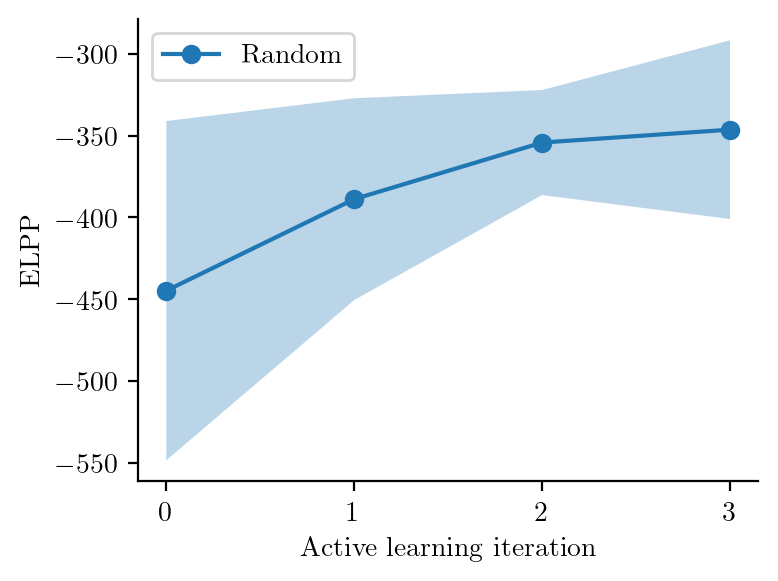

In [29]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)

for name, df in name_to_df.items():
    rounds = df['round'].unique()

    xs = list(sorted(rounds))
    ys = np.array([df[df['round'] == i]['elpp'].mean() for i in xs])
    yerrs = np.array([df[df['round'] == i]['elpp'].std() for i in xs])

    ax.plot(xs, ys, marker='o', label=name)
    ax.fill_between(xs, ys - yerrs, ys + yerrs, alpha=0.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Active learning iteration')
ax.set_xticks(xs)
ax.set_ylabel('ELPP')

ax.legend()

plt.show()